Brian White (bcw824), Kyle Polansky (kpp???)


# <p style="text-align: center;">EE 461P: Data Science Principles</p>
# <p style="text-align: center;">Assignment 4</p>
## <p style="text-align: center;">Total points: 60</p>
## <p style="text-align: center;">Due: Thursday, November 9th, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group.  

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1 - Bayesian Classifiers (15 pts)

In this problem, you will classify between digits 8 and 9 of the MNIST dataset using Bayesian classifiers (LDA, QDA and Naive Bayes) The code below loads the dataset and all necessary sklearn modules. Look up any module on the scikit-learn website for a full description.

1. Train Linear Discriminant Analysis, Quadratic Discriminant Analysis, and (Gaussian) Naive Bayes. Extract the probability of the class being digits 8 or digits 9 for every row. 
2. Use this to plot the receiver operating characteristic (ROC) curve. (one figure for all 3 models, with a label for each line) 
3. Report the area under the ROC curve (AUC) for each model. (5 pts for each model. Total of 15 pts)

In [22]:
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata("MNIST original", data_home='./dataset/')  # data downloaded in'./dataset/', change if necessary

X= (mnist.data / 255.)
y = mnist.target

X_train = X[:60000]
y_train = y[:60000]

X_test = X[60000:]
y_test = y[60000:]

In [6]:
idx = (y_train == 8) + (y_train==9)
X_train = X_train[idx]
y_train = y_train[idx]
y_train = (y_train-8)

idx = (y_test == 8) + (y_test==9)
X_test = X_test[idx]
y_test = y_test[idx]
y_test = (y_test-8)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(11800, 784) (11800,) (1983, 784) (1983,)


In [32]:
lda = LDA()
lda.fit(X_train, y_train)
lda_y_preds = lda.predict(X_test)

/Users/connorwhite/anaconda3/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [33]:
qda = QDA()
qda.fit(X_train, y_train)
qda_y_preds = qda.predict(X_test)

/Users/connorwhite/anaconda3/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [34]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_y_preds = gnb.predict(X_test)

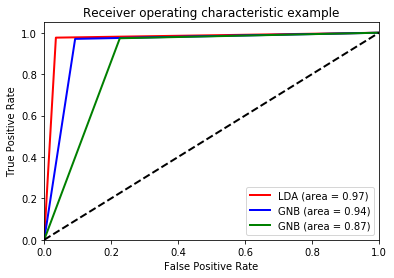

In [35]:
fpr_l, tpr_l, _ = roc_curve(y_test, lda_y_preds)
roc_auc_l = auc(fpr_l, tpr_l)

fpr_q, tpr_q, _ = roc_curve(y_test, qda_y_preds)
roc_auc_q = auc(fpr_q, tpr_q)

fpr_g, tpr_g, _ = roc_curve(y_test, gnb_y_preds)
roc_auc_g = auc(fpr_g, tpr_g)

plt.figure()
lw = 2
plt.plot(fpr_l, tpr_l, color='red',
         lw=lw, label='LDA (area = %0.2f)' % roc_auc_l)
plt.plot(fpr_q, tpr_q, color='blue',
         lw=lw, label='GNB (area = %0.2f)' % roc_auc_q)
plt.plot(fpr_g, tpr_g, color='green',
         lw=lw, label='GNB (area = %0.2f)' % roc_auc_g)
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Solutions

# Question 2: Bayesian Networks (10 pts)
In the Bayesian Network shown below, the nodes represent the following random variables: S stands for "Smoking", LC for "Lung Cancer", B for "Bronchitis", T for "Tuberculosis", D for "Dyspnea". The necessary conditional probabilities are provided alongside. 

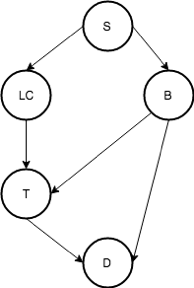

In [7]:
from IPython.display import Image
Image(filename='BayesianNetworks.png')

$$Pr(S = yes) = 0.1$$
$$Pr(LC = yes | S = yes) = 0.03$$
$$Pr(LC = yes | S = no) = 0.01$$
$$Pr(B = yes | S = yes) = 0.06$$
$$Pr(B = yes | S = no) = 0.02$$
$$Pr(T = yes | LC = yes, B = yes) = 0.8$$
$$Pr(T = yes | LC = yes, B = no) = 0.5$$
$$Pr(T = yes | LC = no, B = yes) = 0.1$$
$$Pr(T = yes | LC = no, B = no) = 0.04$$
$$Pr(D = yes | T = yes, B = yes) = 0.9$$
$$Pr(D = yes | T = yes, B = no) = 0.7$$
$$Pr(D = yes | T = no, B = yes) = 0.65$$
$$Pr(D = yes | T = no, B = no) = 0.015$$

Compute the following probabilities:

(a) (2 pts) $Pr(D = yes)$

(b) (2 pts) $Pr(LC = no, B = yes, D = yes)$

(c) (3 pts) Given that a person has Bronchitis (B = yes) and no Lung Cancer (LC = no), the probability he will has symptoms of Dyspnea (D = yes).

(d) (3 pts) Given that a person is a smoker (S = yes), the probability he will get infected with Tuberculosis (T = yes).

## Solutions

# Question 3 - Logistic Regression Classification (15pts)

Using the MNIST dataset in Q1, the goal is to build a Logistic Regression classifier to classify between digits $\textbf{8 and 9}$.  Note that the imported MNIST dataset has 10 labels, from digits 0 to 9.  Use the code below to access the data set and extract the MNIST data.

1. Train a logistic regression with almost no regularization (pass l2 (ridge) to penalty and 1,000,000 to the C parameter which is the inverse of regularization strength lambda. This essentially does l2 regularization but applies very little weight to the penalty term) and report the [confusion matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) on the test data. Also report the accuracy for the "y = 0" class, the "y = 1" class, and the average per-class accuracy on the test data. Average per-class accuracy is described in this [post](http://rasbt.github.io/mlxtend/user_guide/evaluate/scoring/). You can use your confusion matrix to calculate this.  (4pts)
2. Repeat step 1 except use l2 penalty with Cs of [0.01, 0.1, 1, 10 ,100]. You will want to use 3-fold cross validation to select the best parameter. To evaluate which parameter is best, maximize the average per-class accuracy. To help with this task, check out [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) and how to make your own [custom scorer](http://scikit-learn.org/stable/modules/model_evaluation.html).  (4pts)
3. Repeat question 2 except use l1 instead of l2 as the penalty type, use Cs of  [0.01, ..., 100].  Compare the performances of the models (no regularization, l2, l1) using the average per-class accuracy.  (3pts)
4. Using the optimal regularization parameter obtained in step 2, train a logistic regression classifier with ridge penalty to clasify $\textbf{all 10 digits}$ (digits 0,1,2,3,...9) of the MNIST dataset.  Use 'newton-cg' and 'multinomial' options for solver and multi_class parameters, respectively. Report the average per-class accuracy and confusion matrix (10 X 10) on the test data. (4pts)

In [31]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l2', C=1000000)
lr.fit(X_train, y_train)
y_preds_lr = lr.predict(X_test)

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_preds_lr)

array([[939,  35],
       [ 35, 974]])

Average Per-Class Accuracy: (939 + 974) / 1983 = 0.9647%

In [58]:
def score_acc(clf, X, y):
    y_preds = clf.predict(X)
    c_mat = confusion_matrix(y, y_preds)
    total = 0
    diagonal = 0
    for r in range(0, len(c_mat)):
        for c in range(0, len(c_mat[r])):
            total += c_mat[r][c]
            if c == r:
                diagonal += c_mat[r][c]
    return diagonal/total

In [60]:
from sklearn.model_selection import GridSearchCV
lr2 = LogisticRegression(penalty='l2')
parameters = {'C':[0.01, 0.1, 1, 10, 100]}
clf = GridSearchCV(lr2, parameters, scoring=score_acc)
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True,
       scoring=<function score_acc at 0x11ca421e0>, verbose=0)

In [61]:
lr1 = LogisticRegression(penalty='l1')
clf = GridSearchCV(lr1, parameters, scoring=score_acc)
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True,
       scoring=<function score_acc at 0x11ca421e0>, verbose=0)

## Solutions

# Question 4: Regression Trees (6+5+4 = 15 points)
In this question, we will be exploring the application of regression tree (RT) using sklearn package in Python. 

You will be using an NBA dataset (nbasalariesfull.csv) to predict a player’s Salary using all the numeric performance variables available ( so everything but Player, Team, and Position ). 

- a. Use a random state of 42 and a test size of 1/3 to split the data into training and test.
     
         Build a regression using DecisionTreeRegressor with max_depth = 6. 
         Report the mean squared errors on both training and test datasets.( 6 points )


- b. Repeat Part-1 with max_depth = 2. (5 points )


- c. Briefly explain what you observe from these MSE values obtained by using maximum tree depths 6 and 2? 
         Which tree is better and why? ( 4 points )

## Solutions

# Question 5.  AUC vs Lift Curve ( 5 points )
Describe the similarities and differences between AUC and Lift Curves.

## Solution